<a href="https://colab.research.google.com/github/sahilpokhriyal/cv/blob/main/Supervised_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

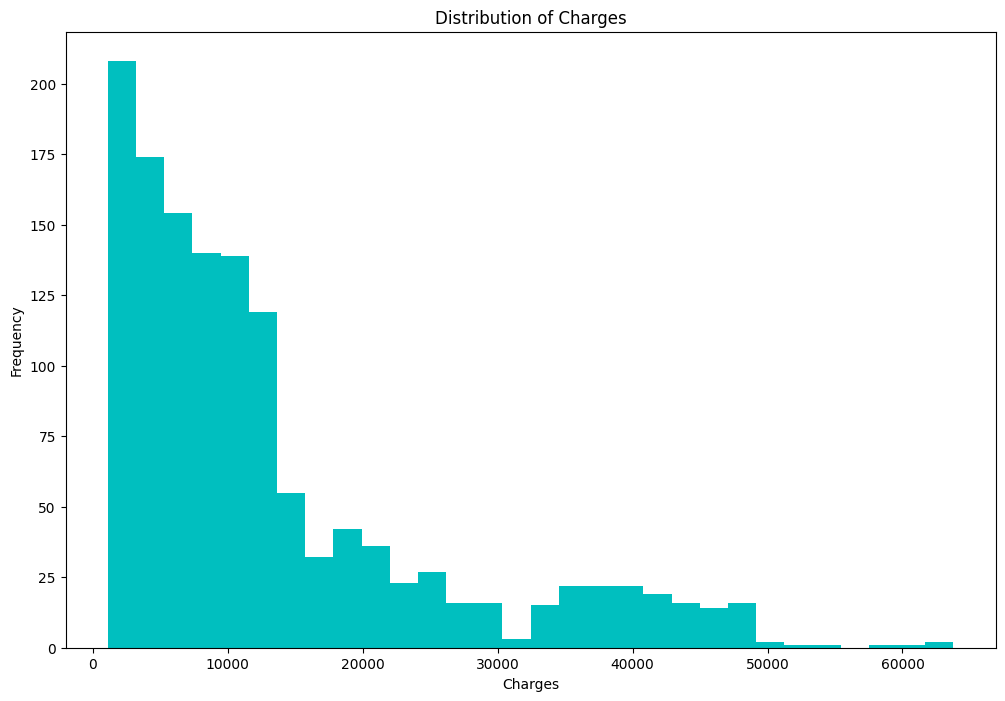

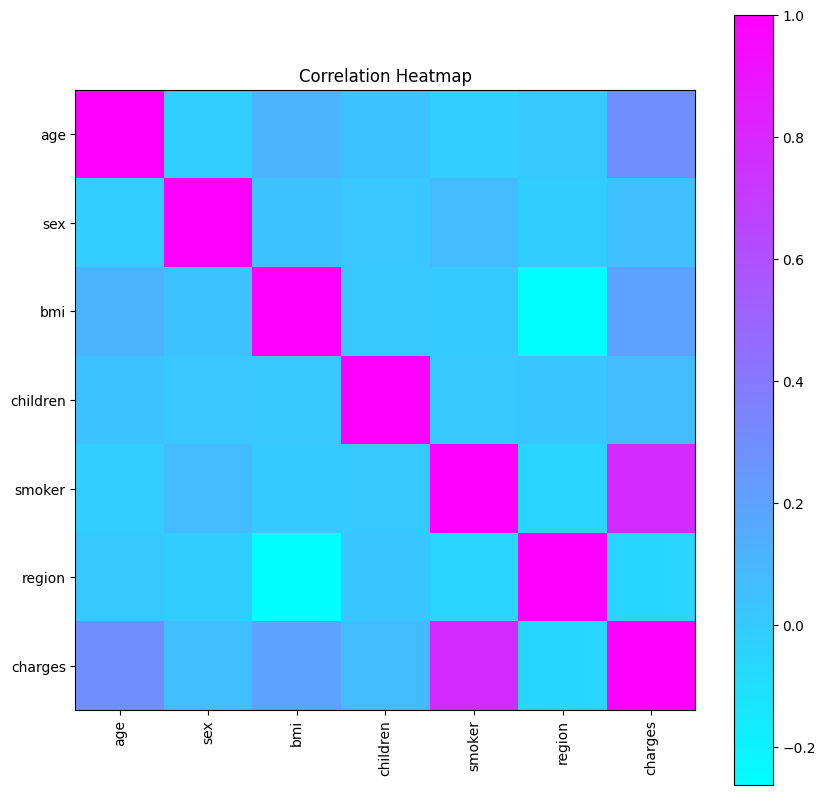

Intercept: -12907.696882586846
Coefficients: [  256.96796596  -128.95608532   337.0245187    468.35404686
 23867.05868713   297.83720698]
R-squared: 0.7504397033719741


In [18]:
#Linear Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Medical Price Dataset.csv')

# Data visualization
plt.figure(figsize=(12, 8))
plt.hist(df['charges'], bins=30, color='c')
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

# Convert categorical labels to numerical using LabelEncoder
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
df['region'] = df['region'].map({'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3})

# Correlation heatmap
corr_matrix = df.corr()
plt.figure(figsize=(10, 10))
plt.imshow(corr_matrix, cmap='cool')
plt.colorbar()
plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns, rotation='vertical')
plt.yticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Heatmap')
plt.show()

# Linear Regression
x = df.drop(['charges'], axis=1).values
y = df['charges'].values

# Add intercept column to x
x = np.c_[np.ones(x.shape[0]), x]

# Calculate theta using normal equation
theta = np.linalg.inv(x.T @ x) @ x.T @ y

intercept = theta[0]
coefficients = theta[1:]

print('Intercept:', intercept)
print('Coefficients:', coefficients)

# Predict on test data
y_pred = x @ theta

# Calculate R-squared
ss_total = ((y - np.mean(y)) ** 2).sum()
ss_residual = ((y_pred - y) ** 2).sum()
r_squared = 1 - (ss_residual / ss_total)

print('R-squared:', r_squared)
